In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings("ignore")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <b style="text-align:center;padding-left:28%">Reading the Train and Test datasets</b>
</div>

In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s3e16/train.csv",index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')


In [4]:
testid = test['id']

In [5]:
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [6]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <p>Since the target column (age) is Numerical and continious. We can use regression algorithms.</p>
    <p>Now our task is to encode all the categorical columns to Numerical columns.</p>
</div>

In [7]:
train.Sex.value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <p>There are three kinds of values 'M', 'F', 'I'</p>
    <p>Let's Encode the Sex column</p>
</div>

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])

In [10]:
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [11]:
test['Sex'] = le.transform(test['Sex'])

In [12]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <p> Now, as we encoded all the data into Numerical values. It's time to check for any NaN values and fill them.</p>
    
</div>



In [13]:
train.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [14]:
test.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
dtype: int64

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <b style='padding-left:35%'>Basic EDA & Preprocessing</b>
   </div>

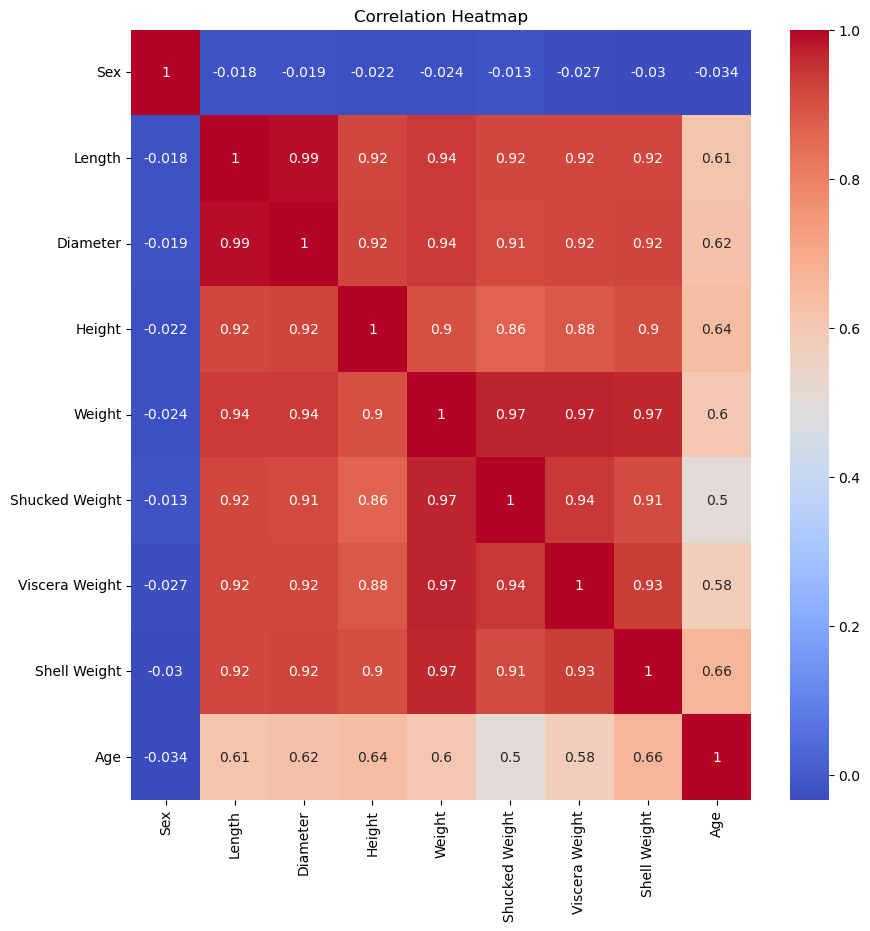

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">Columns before Scaling

array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Shucked Weight'}>],
       [<Axes: title={'center': 'Viscera Weight'}>,
        <Axes: title={'center': 'Shell Weight'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

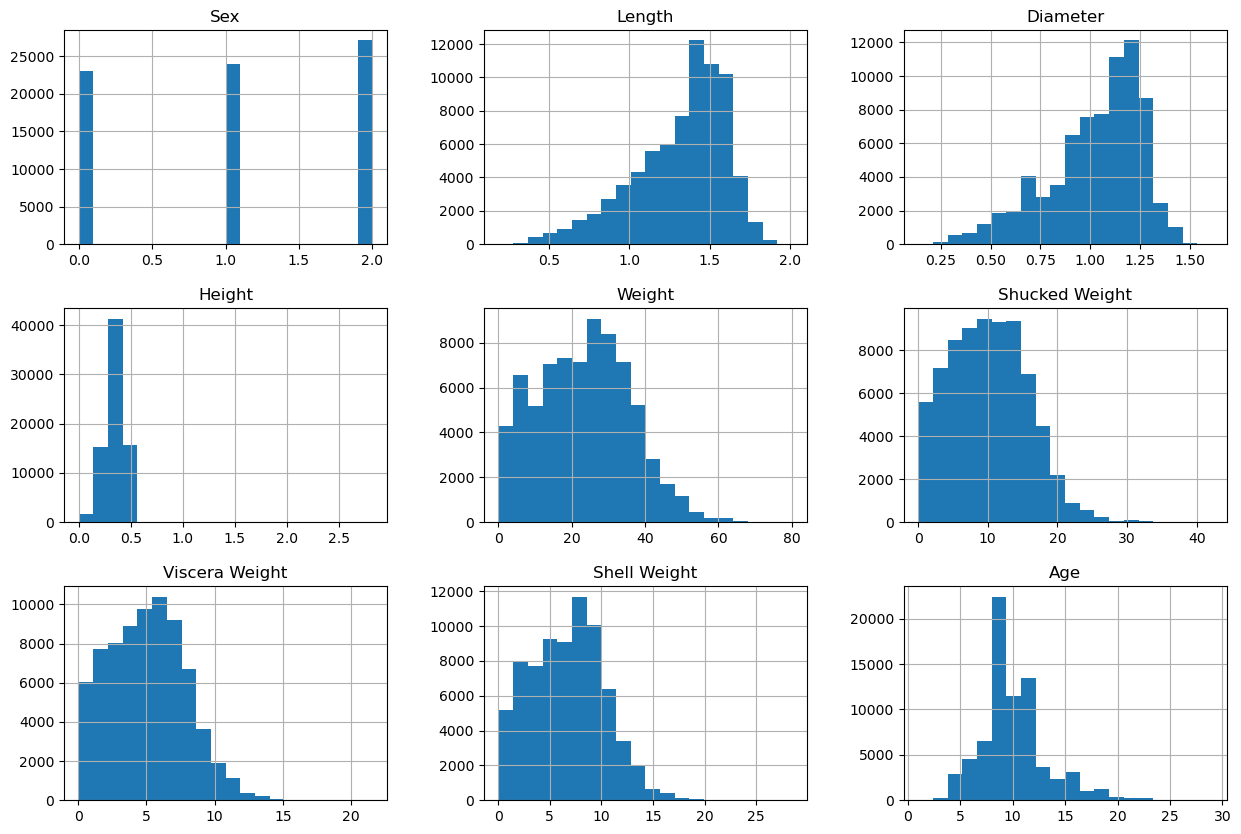

In [16]:
train.hist(bins=20, figsize=(15,10))

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">using Z-score method to eliminate the outliers

In [17]:
from scipy.stats import zscore

z=np.abs(zscore(train))
z

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,0.067040,0.721238,0.633982,0.292400,0.441804,0.467188,0.569186,0.453376,0.304805
1,0.067040,0.755712,0.840356,0.794163,1.025198,0.993688,0.978880,0.926788,0.619749
2,1.151518,0.243401,0.370707,0.292400,0.110076,0.219924,0.178363,0.017224,0.304805
3,1.285599,1.329394,1.634426,1.650603,2.156483,1.824616,2.124622,2.308095,0.325083
4,0.067040,0.234435,0.050532,0.115061,0.007598,0.333464,0.197233,0.214955,0.619749
...,...,...,...,...,...,...,...,...,...
74046,1.285599,1.199075,1.002567,0.971501,2.156483,1.882648,1.899000,1.564626,0.010139
74047,0.067040,0.842591,0.682391,0.794163,1.022957,1.029011,0.989031,0.887242,1.249637
74048,1.285599,0.590919,0.739292,0.699861,0.482150,0.391495,0.888951,0.378238,0.010139


In [18]:
train_new=train[(z<3).all(axis=1)]
train_new

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,0,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,0,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">correlation after eliminating the outliers

<Axes: >

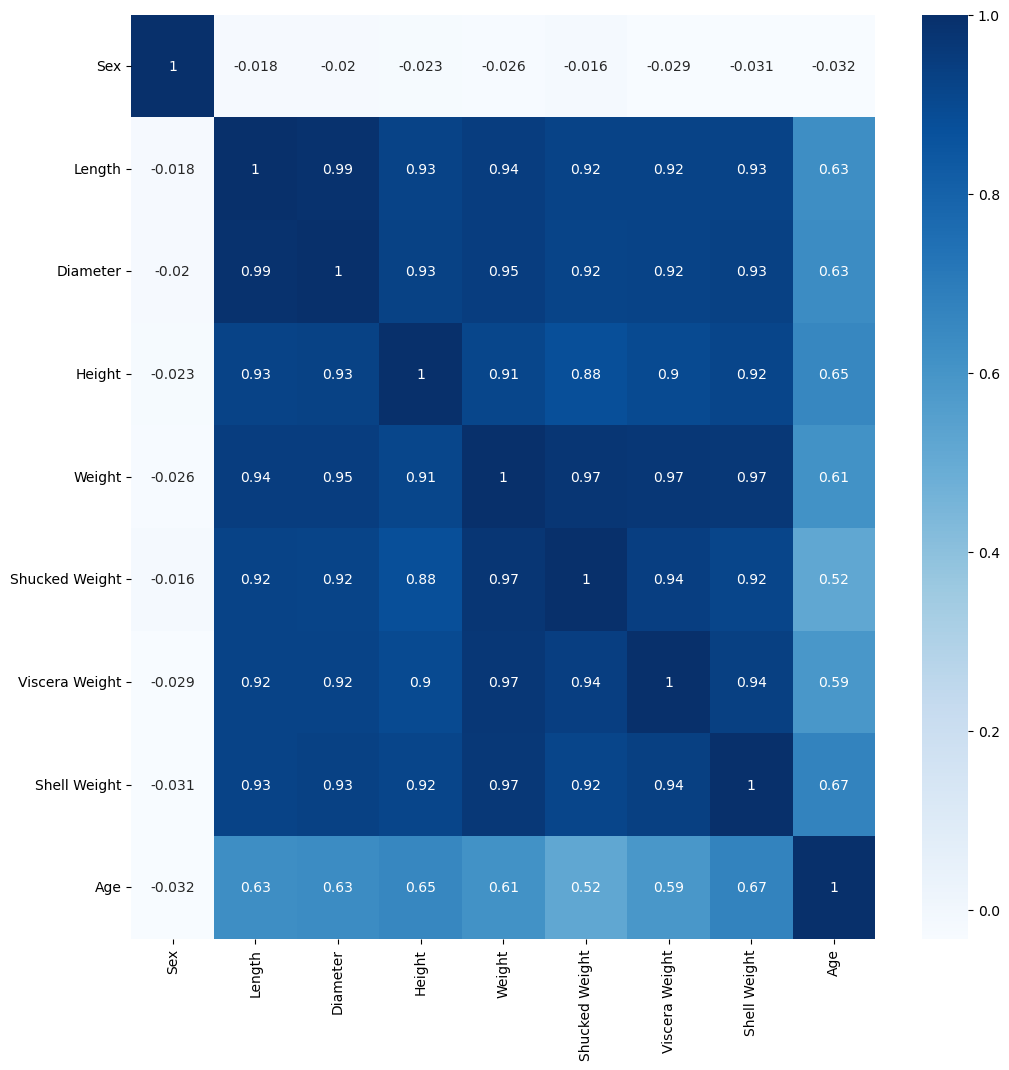

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(train_new.corr(),cmap='Blues',annot=True)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <p style='text-align:center'> Scaling the Data</p>
   </div>

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [26]:
cols = ['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight']

for col in cols:
    train_new[col] = sc.fit_transform(train_new[[col]])
    
for col in cols:
    test[col] = sc.fit_transform(test[[col]])



In [27]:
train_new.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,1,0.750653,0.659592,0.315031,0.482864,0.501619,0.608657,0.503291,9
1,1,-0.788398,-0.873927,-0.829764,-1.046376,-1.015155,-0.995804,-0.947599,8
2,2,0.252725,0.385749,0.315031,0.137061,0.244894,0.203596,0.008575,9
3,0,1.384380,1.700195,1.746025,2.270287,1.910987,2.220756,2.453055,11
4,1,-0.245204,-0.052399,-0.114267,0.014395,0.362778,-0.185683,-0.199289,8


In [28]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,1,-0.940227,-1.115249,-0.798762,-1.174409,-1.153502,-1.197655,-1.125492
1,74052,1,-0.548169,-0.586910,-0.798762,-0.629467,-0.552334,-0.654334,-0.776635
2,74053,0,-0.112548,-0.164238,-0.256807,-0.703471,-0.815029,-0.425835,-0.538778
3,74054,0,0.802256,-0.164238,0.420637,0.388656,0.579278,0.528784,0.079651
4,74055,1,-0.722417,-0.745411,-0.934251,-0.925485,-0.820081,-0.933611,-0.955027


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    Before and after eliminating the outliers

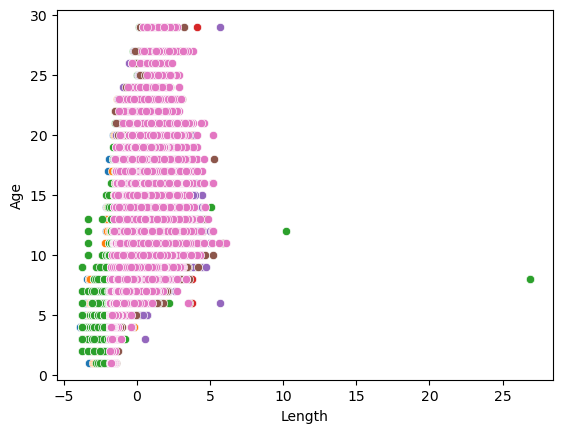

In [48]:
for col in cols:
    sns.scatterplot(train, x=col, y='Age')

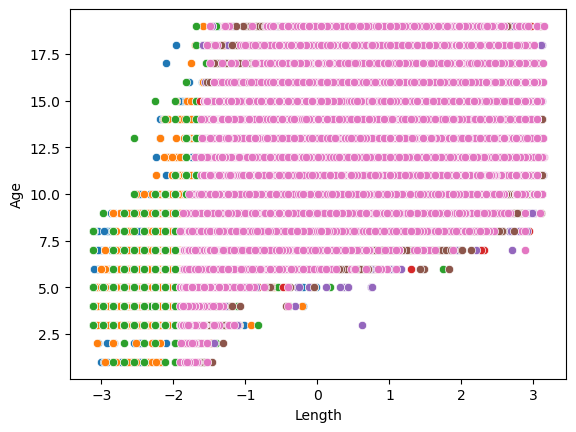

In [29]:
for col in cols:
    sns.scatterplot(train_new, x=col, y='Age')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    Assigning the features and labels
    <div>

In [37]:
X = train_new.iloc[:,0:-1]

In [38]:
y = train_new.iloc[:,-1]


In [39]:
y.head()

id
0     9
1     8
2     9
3    11
4     8
Name: Age, dtype: int64

In [40]:
X.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
0,1,0.750653,0.659592,0.315031,0.482864,0.501619,0.608657,0.503291
1,1,-0.788398,-0.873927,-0.829764,-1.046376,-1.015155,-0.995804,-0.947599
2,2,0.252725,0.385749,0.315031,0.137061,0.244894,0.203596,0.008575
3,0,1.384380,1.700195,1.746025,2.270287,1.910987,2.220756,2.453055
4,1,-0.245204,-0.052399,-0.114267,0.014395,0.362778,-0.185683,-0.199289


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">
    <p style='text-align:center'>Now we can split the data into training and test data</p>
    </div>

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#4605fa;
           font-size:150%;
           font-family:Verdana;
           letter-spacing:0.5px;">Using the Random Forest Regressor

In [46]:
rf = RandomForestRegressor(max_depth=15,n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, random_state=42)

In [51]:
rf_preds = rf.predict(X_test)

In [52]:
print('train score: ',rf.score(X_train,y_train))
print('test score: ',rf.score(X_test,y_test))
print('Mean Absolute Error: ',mean_absolute_error(y_test,rf_preds))

train score:  0.8048294668334564
test score:  0.5855870691233775
Mean Absolute Error:  1.317110936282579


In [54]:
test.set_index('id',inplace=True)

In [55]:
sub = pd.DataFrame({'id':testid,'Age':rf.predict(test)})

In [56]:
sub

,id,Age
0,74051,7.958677
1,74052,7.687325
2,74053,11.060240
3,74054,10.979922
4,74055,7.540270
...,...,...
49363,123414,10.786705
49364,123415,8.631369
49365,123416,12.402775
49366,123417,9.868048


In [57]:
sub.to_csv('/kaggle/working/sub_rf.csv')

NameError: name 'RandomForestRegressor' is not defined

0.5664183578703077

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,I,M
29845,1.5000,1.1250,0.3750,27.739986,13.706983,6.818055,7.229122,0,1
28855,1.6500,1.3125,0.4375,37.619786,17.009700,7.470093,10.404267,0,0
4600,1.4000,1.1250,0.4125,24.848337,9.525432,6.562909,7.796112,0,1
66932,1.3125,1.0125,0.3625,19.745427,8.122132,4.904464,4.961163,0,0
17773,0.8125,0.7000,0.1875,6.336113,3.260193,1.219029,1.559222,1,0


[14:51:04] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

0.5763525846709973

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0.027101,-0.313170,-0.793172,-0.507899,-0.357481,-0.978855,-0.700676
1,0.635823,0.688357,0.700294,0.556510,0.316892,0.571943,0.617737
2,-0.538141,-0.418594,-0.114324,-0.685113,-0.761600,-0.805979,-0.609615
3,1.114105,1.057341,1.243373,1.253031,1.309509,1.273615,0.974065
4,-0.146820,-0.102322,0.157216,0.001313,-0.559541,0.271953,0.142633


,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,I,M
44234,44234,0.809744,0.899205,0.700294,0.532957,0.079472,0.353306,0.815697,1,0
30428,30428,-2.625190,-2.579785,-2.015100,-1.690077,-1.663290,-1.660189,-1.757783,0,0
42684,42684,0.418422,0.424797,0.292985,0.409579,0.885185,0.500759,-0.174103,0,1
71930,71930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
35370,35370,-1.233824,-1.209274,-1.200481,-1.165163,-1.148039,-1.228000,-1.148066,1,0
...,...,...,...,...,...,...,...,...,...,...
16725,16725,1.027145,1.004629,0.971834,1.214896,0.486117,0.861764,1.528353,1,0
58628,58628,-0.581622,-0.049610,-0.793172,-0.735586,-0.602478,-0.414466,-0.728391,1,0
64181,64181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
21192,21192,-0.059859,-0.102322,-0.250093,-0.189361,-0.481243,-0.368705,-0.174103,1,0


id                    0
Length            11813
Diameter          11813
Height            11813
Weight            11813
Shucked Weight    11813
Viscera Weight    11813
Shell Weight      11813
I                     0
M                     0
dtype: int64

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,id,I,M
0,0.631000,0.789649,0.291573,0.690266,0.852047,0.657007,0.532442,0.0,1.0,0.0
1,-0.588052,-0.582768,-0.803296,-0.875726,-0.805917,-0.840700,-0.930977,NaN,NaN,NaN
2,-1.066965,-1.057836,-0.803296,-1.121218,-0.985088,-1.069164,-1.144557,2.0,0.0,1.0
3,-0.631589,-0.793909,-0.940155,-0.882452,-0.846294,-0.617313,-1.010080,3.0,0.0,0.0
4,-1.807103,-1.796830,-1.624449,-1.472081,-1.298007,-1.444860,-1.453061,4.0,1.0,0.0
5,0.892225,0.789649,0.839008,0.961541,0.688017,1.083473,0.848856,NaN,NaN,NaN
6,0.674537,0.684078,0.702150,0.677936,0.609787,0.464082,0.912139,6.0,0.0,1.0
7,-1.241115,-1.374547,-1.487590,-1.365589,-1.313148,-1.429629,-1.350226,7.0,1.0,0.0
8,-0.326827,-0.371627,-0.255861,-0.743452,-0.672170,-0.642698,-0.630383,8.0,0.0,0.0
9,-0.675127,-0.582768,-1.077014,-0.929532,-1.080983,-1.140242,-0.535458,9.0,0.0,1.0
